In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
# ZADANIE 1
def optimal_solution(w, W, p):
    tab = list(np.zeros((pow(2,len(w)),len(w)), dtype=int))

    for i in range(pow(2,len(w))):
        num = bin(i)
        num = (list(num[2:]))
        for j in range(len(num)):
            tab[i][j] = int(num[len(num)-1-j])

    weight = []
    value = []

    for i in range(len(tab)):
        weight.append(sum(tab[i]*np.transpose(w)))
        value.append(sum(tab[i]*np.transpose(p)))

    for i in range(len(weight)):
        if weight[i] > W:
            weight[i] = 0
            value[i] = 0

    max_value = max(value)
    max_weigth = weight[value.index(max(value))]

    print('max value: ',max_value, 'max weight: ', max_weigth)

In [3]:
w = np.array([8, 3, 5, 2])          #waga przedmiotów
W = 9                               #maksymalna waga plecaka
p = np.array([16, 8, 9, 6])         #wartość przedmiotów

optimal_solution(w, W, p)

max value:  17 max weight:  8


In [4]:
w = np.array([8, 3, 5, 2, 5])          #waga przedmiotów
W = 11                                  #maksymalna waga plecaka
p = np.array([16, 8, 9, 6, 20])         #wartość przedmiotów

optimal_solution(w, W, p)

max value:  34 max weight:  10


In [5]:
# ZADANIE 2
def heuristic(w, W, p):
    p_per_w = list(p/w)
    indexes = np.flip(np.argsort(p_per_w))
    p_per_w = np.array(p_per_w)
    p_per_w = p_per_w[indexes]
    w = w[indexes]
    p = p[indexes]

    curr_weight = 0
    curr_value = 0

    for i in range(len(p_per_w)):
        curr_weight += w[i]
        if (curr_weight < W):
            curr_value += p[i]
        else:
            print('max value: ',curr_value, 'max weight: ', prev_weight)
            break
        prev_weight = curr_weight

In [6]:
w = np.array([8, 3, 5, 2])          #waga przedmiotów
W = 9                               #maksymalna waga plecaka
p = np.array([16, 8, 9, 6])         #wartość przedmiotów
heuristic(w, W, p)

max value:  14 max weight:  5


In [7]:
w = np.array([8, 3, 5, 2, 5])          #waga przedmiotów
W = 11                                  #maksymalna waga plecaka
p = np.array([16, 8, 9, 6, 20])         #wartość przedmiotów

heuristic(w, W, p)

max value:  34 max weight:  10


In [8]:
# Jak dużą instancję problemu (liczba przedmiotów) da się rozwiązać w około minutę metodą zachłanną?
number_of_elem = 1000000
w = np.random.randint(low = 1, high = 100, size = number_of_elem)          #waga przedmiotów
W = 100000000                                  #maksymalna waga plecaka
p = np.random.randint(low = 1, high = 100, size = number_of_elem)          #wartość przedmiotów

heuristic(w, W, p)

In [9]:
measured_time_heuristic = []
measured_time_optimal = []
x_axis = []
for i in range(8):
    start = time.time()
    number_of_elem = 10**i
    x_axis.append(number_of_elem)
    w = np.random.randint(low = 1, high = 100, size = number_of_elem)          #waga przedmiotów
    W = 100000000                                  #maksymalna waga plecaka
    p = np.random.randint(low = 1, high = 100, size = number_of_elem)          #wartość przedmiotów
    heuristic(w, W, p)
    end = time.time()
    measured_time_heuristic.append(end - start)

max value:  256359151 max weight:  99999968


Text(0, 0.5, 'czas [s]')

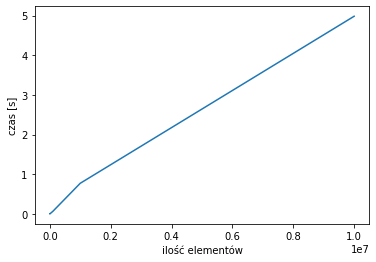

In [10]:
plt.plot(np.transpose(x_axis), measured_time_heuristic)
plt.xlabel("ilość elementów")
plt.ylabel("czas [s]")

In [11]:
measured_time_optimal = []
x_axis = []
for i in range(1,20):
    start = time.time()
    number_of_elem = i
    x_axis.append(number_of_elem)
    w = np.random.randint(low = 1, high = 100, size = number_of_elem)          #waga przedmiotów
    W = 100000000                                                               #maksymalna waga plecaka
    p = np.random.randint(low = 1, high = 100, size = number_of_elem)          #wartość przedmiotów
    optimal_solution(w, W, p)
    end = time.time()
    measured_time_optimal.append(end - start)

max value:  87 max weight:  2
max value:  111 max weight:  124
max value:  157 max weight:  106
max value:  79 max weight:  197
max value:  249 max weight:  173
max value:  297 max weight:  373
max value:  302 max weight:  394
max value:  438 max weight:  381
max value:  407 max weight:  318
max value:  412 max weight:  563
max value:  434 max weight:  517
max value:  715 max weight:  663
max value:  644 max weight:  562
max value:  416 max weight:  640
max value:  730 max weight:  906
max value:  749 max weight:  724
max value:  789 max weight:  930
max value:  889 max weight:  958
max value:  1093 max weight:  1051


Text(0, 0.5, 'czas [s]')

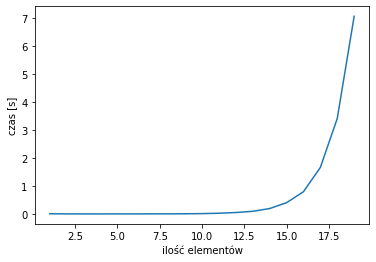

In [12]:
plt.plot(np.transpose(x_axis), measured_time_optimal)
plt.xlabel("ilość elementów")
plt.ylabel("czas [s]")